# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
#print(json.dumps(btc_response_data, indent=2))
btc_price = btc_response_data["data"]["1"]["quotes"]["USD"]["price"]
#print(f"Bitcoin price: ${btc_price}")

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
#print(json.dumps(eth_response_data, indent=2))
eth_price = eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]
#print(f"Ethereum price: ${eth_price}")

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13663.92
The current value of your 5.3 ETH is $1956.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
ticker_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_shares = ["crypto", "shares"]
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

df_savings = {
    "amount": [total_crypto_value, total_shares_value]
}
df_savings = pd.DataFrame(df_savings, index=crypto_shares)

# Display savings DataFrame
display(df_savings)

,amount
crypto,15620.733
shares,40938.500


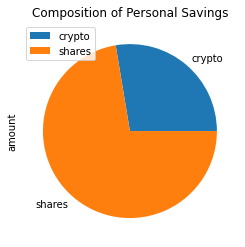

In [13]:
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print(emergency_fund)

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
#print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations!!! You have enough money in this fund.")
elif total_savings == emergency_fund: 
    print("Congratulations!!! For reaching this financial goal")
elif total_savings < emergency_fund:
    savings_needed = emergency_fund - total_savings
    print(f"You are ${savings_needed} away from reaching the goal")


Congratulations!!! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-12', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-10-12 00:00:00-04:00  201.42  201.76  200.91  201.55  42032769  
2015-10-13 00:00:00-04:00  200.65  202.16  200.05  200.22  72076783  
2015-10-14 00:00:00-04:00  200.18  200.87  198.94  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.64  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.92  203.14  79323870

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_traditional_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_traditional_dist.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-12 00:00:00-04:00          NaN  201.42  201.76  200.91  201.55   
2015-10-13 00:00:00-04:00     0.000000  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.92  203.14   

                                                  
                             volume daily_return  
2015-10-12 00:00:00-04:00  42032769          NaN  
2015-10-13 00:00:00-04:00  72076783    -0.006599  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_traditional_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005455,1.007470,1.002765,1.000541,0.994177,0.996952,0.993719,1.005669,1.002176,0.997468,...,1.004619,0.995698,1.010778,0.997572,1.004467,0.991848,0.994996,0.996997,1.011185,0.994059
2,1.006857,1.008754,0.993018,1.002106,0.982882,0.987202,0.991228,1.004272,0.994751,0.982812,...,0.996337,0.998925,1.008526,1.004396,1.002736,0.989250,1.003008,0.990817,1.005089,0.981253
3,1.004451,1.016979,0.996435,0.997640,0.979737,0.990580,0.984595,1.010575,1.010983,0.988063,...,1.006556,1.000521,1.019602,0.998697,0.998710,0.988821,1.010159,0.979694,1.009079,0.986193
4,0.998075,1.017334,1.005732,0.987243,0.964120,1.008381,0.985756,1.010993,1.012005,0.982755,...,1.010154,1.005116,1.005399,0.994239,1.004041,0.998155,1.024542,0.981855,1.002548,0.978824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.401919,2.915980,6.910788,18.593567,4.418455,4.981813,6.641320,12.823993,6.073564,31.398935,...,7.346896,5.085362,16.436551,8.432984,12.738731,12.815025,13.053708,12.679413,4.451668,9.033225
7557,26.011211,2.917322,6.930695,18.728804,4.402366,4.985381,6.666361,12.603459,6.027513,31.562598,...,7.395629,5.074162,16.486951,8.325154,12.665841,12.988914,12.912803,12.640109,4.431877,9.092698
7558,26.101601,2.934389,6.950792,18.632400,4.436344,4.903659,6.689185,12.590302,6.034399,31.891612,...,7.410090,5.148459,16.442201,8.377656,12.763847,12.955991,12.780121,12.646581,4.495851,9.050055
7559,25.965461,2.953607,6.958642,18.429397,4.402949,4.914596,6.731582,12.555893,6.088894,31.803773,...,7.438208,5.160412,16.303276,8.461418,12.810359,12.905942,12.727046,12.554279,4.445922,9.102229


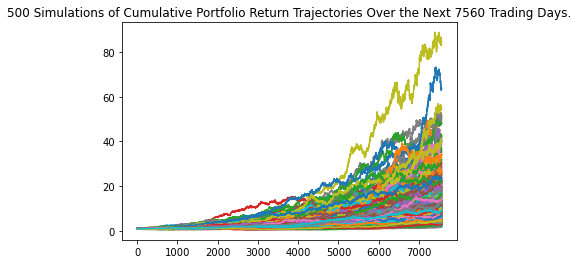

In [20]:
# Plot simulation outcomes
line_plot = MC_traditional_dist.plot_simulation()

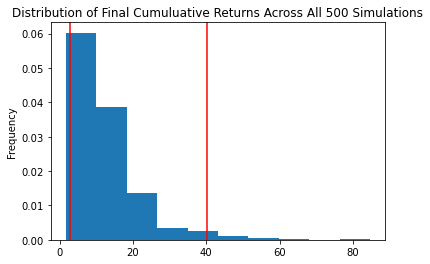

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_traditional_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
traditional_tbl = MC_traditional_dist.summarize_cumulative_return()

# Print summary statistics
print(traditional_tbl)

count           500.000000
mean             12.699580
std               9.720365
min               1.693087
25%               6.384622
50%               9.971344
75%              15.618944
max              84.690080
95% CI Lower      2.865288
95% CI Upper     40.229721
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_trad = round(traditional_tbl[8]*initial_investment,2)
ci_upper_trad = round(traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_trad} and ${ci_upper_trad}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57305.76 and $804594.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_trad = round(traditional_tbl[8]*initial_investment,2)
ci_upper_trad = round(traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_trad} and ${ci_upper_trad}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $85958.64 and $1206891.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999099,0.993146,0.991377,1.007017,0.997970,1.010654,0.993118,1.004031,0.989694,1.001050,...,0.994716,0.990806,1.008573,0.989998,1.005180,1.000966,1.006316,1.002825,0.999836,0.992769
2,0.993286,0.982147,0.997789,1.011631,0.992166,1.009235,0.991753,1.008929,0.983516,0.985502,...,0.975101,0.996407,1.007407,0.984191,0.998621,1.000933,1.000045,1.007513,1.010216,1.004545
3,1.005029,0.990341,0.991045,1.013165,0.983825,1.008767,0.979713,1.016238,0.978908,0.980501,...,0.970491,1.004080,0.996038,0.975459,0.991014,0.995555,0.998031,1.004134,1.016235,1.002405
4,1.010581,0.982892,0.989949,1.004098,0.995532,1.020951,0.985694,1.014936,0.981853,0.977604,...,0.983224,1.010778,0.978484,0.970296,0.989479,0.998832,0.989501,0.997681,1.008397,1.003704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.899184,1.137773,1.756819,1.719612,2.915766,1.308572,2.105324,1.519209,1.167883,1.433756,...,1.774735,1.655543,1.609577,1.356252,1.494735,1.512745,1.081553,2.349166,2.559154,1.108376
1257,1.925668,1.147956,1.756193,1.712058,2.897105,1.316994,2.094224,1.542577,1.147752,1.435607,...,1.754832,1.640662,1.612963,1.348410,1.501838,1.509649,1.058463,2.338510,2.558445,1.120985
1258,1.937537,1.126183,1.743931,1.698066,2.851245,1.300770,2.100896,1.543585,1.160634,1.437394,...,1.757391,1.623162,1.623170,1.339421,1.500827,1.509241,1.063761,2.350677,2.568193,1.109058
1259,1.956508,1.116944,1.729924,1.684828,2.861923,1.286795,2.090783,1.540211,1.152563,1.428882,...,1.734253,1.631473,1.640692,1.358491,1.491320,1.503487,1.060523,2.377359,2.600857,1.101596


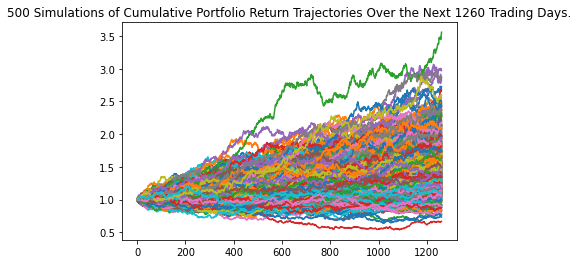

In [27]:
# Plot simulation outcomes
line_plot = MC_five_years.plot_simulation()

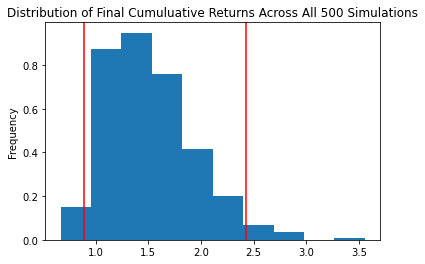

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_years.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.514236
std               0.414579
min               0.666549
25%               1.205201
50%               1.458515
75%               1.752975
max               3.557492
95% CI Lower      0.891517
95% CI Upper      2.425247
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_tbl[8]*initial_investment_five,2)
ci_upper_five = round(five_year_tbl[9]*initial_investment_five,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53491.04 and $145514.79


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004177,1.000193,0.999296,1.003388,1.013840,1.000211,1.009746,1.005547,0.992727,1.004406,...,1.002659,1.002476,0.998330,0.999297,1.003809,1.001722,0.996068,0.998379,1.002974,1.007375
2,1.002620,1.003153,1.003317,1.001544,1.007579,0.997138,1.015258,1.004373,0.996851,1.016250,...,1.011026,1.003963,0.998281,0.997130,1.008377,0.999589,0.996603,1.008437,0.994433,1.012973
3,1.016410,1.003897,1.009829,0.992145,1.012354,1.002399,1.004689,0.986491,0.995207,1.022910,...,1.007834,0.996480,0.991844,0.991083,1.019631,1.008081,1.000523,1.006838,1.004776,1.006258
4,1.014588,1.006885,1.005739,0.983826,1.006219,1.013468,1.006735,0.992942,0.990949,1.016703,...,1.014777,0.997513,0.980266,0.986024,1.031793,1.000303,0.997968,1.014289,1.014857,1.008552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.473826,2.552139,0.790282,1.006123,2.302680,3.708250,1.248634,1.150981,1.822034,2.011908,...,2.378765,1.278949,1.618562,1.899640,1.980857,2.952767,0.949820,4.510953,2.440950,1.506875
2517,4.438714,2.548312,0.798913,0.996432,2.318584,3.747571,1.264174,1.143795,1.827254,2.005635,...,2.363242,1.268932,1.620324,1.912921,2.006758,2.944115,0.948351,4.522182,2.446871,1.502290
2518,4.448145,2.545499,0.799684,0.988013,2.293322,3.745941,1.260113,1.150093,1.825728,1.997675,...,2.361049,1.261748,1.624528,1.935526,2.026474,2.951327,0.955913,4.526756,2.474228,1.520208
2519,4.430045,2.553704,0.787123,0.980156,2.295885,3.780459,1.248668,1.166553,1.841833,2.009721,...,2.388351,1.270853,1.622288,1.940221,2.031809,2.940055,0.948934,4.581110,2.490317,1.539129


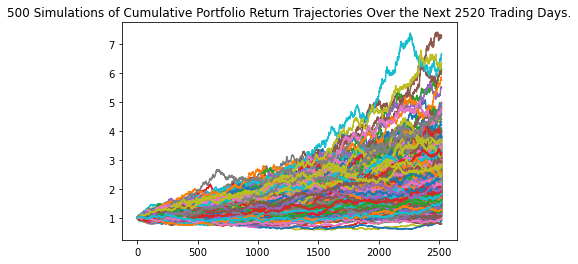

In [33]:
# Plot simulation outcomes
line_plot = MC_ten_years.plot_simulation()

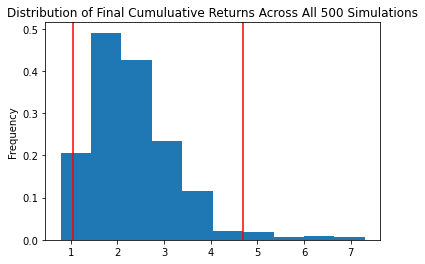

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_years.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.333203
std               0.934703
min               0.780463
25%               1.680551
50%               2.170850
75%               2.809633
max               7.302921
95% CI Lower      1.057534
95% CI Upper      4.693527
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment_ten = 90000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_tbl[8]*initial_investment_ten,2)
ci_upper_ten = round(ten_year_tbl[9]*initial_investment_ten,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 10 years will end within in the range of $95178.02 and $422417.42
